Diabetes Prediction using Machine Learning

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [2]:
df.shape

(1000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [5]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
df.duplicated().sum()   

0

In [7]:
diabetes = df[df['CLASS'] == 'Y']
diabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
156,12,23975,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
157,18,23977,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
158,24,23979,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
159,675,33656789,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
160,39,23984,M,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,Y


In [8]:
Nodiabetes = df[df['CLASS'] == 'N']
Nodiabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [9]:
df['CLASS'].nunique()

5

In [10]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

As you can see there is space issue in the class values. 

In [11]:
df['CLASS'].value_counts()	

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [12]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [13]:
df = df[df['CLASS'].isin(['Y', 'N'])]
df.shape

(947, 14)

Our CLASS column is adjusted, now let's check the Gender column

In [14]:
df['Gender'].nunique()

3

In [15]:
df['Gender'].value_counts()

Gender
M    529
F    417
f      1
Name: count, dtype: int64

In [16]:
# as you can see there are 2 F columns let's fix that.
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

Gender
M    529
F    418
Name: count, dtype: int64

Let's check the Age Column.

In [17]:
df['AGE'].nunique()

50

In [18]:
df['AGE'].value_counts()

AGE
55    180
60     88
54     83
51     51
61     49
56     48
52     44
59     32
57     31
58     30
63     29
50     27
53     25
30     16
45     16
44     13
33     12
40     11
66     11
49     11
35     10
47      9
48      9
62      8
68      8
73      8
42      8
64      7
31      7
67      6
38      6
69      6
43      6
39      5
76      4
41      4
77      4
36      4
28      3
46      3
34      2
26      2
70      2
65      2
75      2
32      1
25      1
79      1
20      1
71      1
Name: count, dtype: int64

Age has 50 unique values they are too much you can use Age as it is in machine learning but reducing the unique values in this column improve the performance of the model and reduct the complexity.

In [19]:
# Following approch will adjust the bins dynamically based on the minimum and maximum age in your dataset, ensuring that each age group contains at least one individual.

min_age = df['AGE'].min()
max_age = df['AGE'].max()


bins = list(range(min_age - min_age % 10, max_age + 10, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]


df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

df['AGE_GROUP'].value_counts()

AGE_GROUP
50-59    551
60-69    214
40-49     90
30-39     63
70-79     22
20-29      7
Name: count, dtype: int64

In [20]:
# now map the age group to 1 to onwar.

age_group_mapping = {
    '20-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80-89': 7,
    '90-100': 8
}


df['AGE_GROUP_NO'] = df['AGE_GROUP'].map(age_group_mapping)

df['AGE_GROUP_NO'].value_counts()



AGE_GROUP_NO
4    551
5    214
3     90
2     63
6     22
1      7
Name: count, dtype: int64

In [21]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,AGE_GROUP,AGE_GROUP_NO
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,20-29,1
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,30-39,2


Dataset's Features Information: <br>

- Gender: Gender of the patient (M for male, F for female). Sample values: F, M
- AGE: Age of the patient. Sample values: 50, 26
- Urea: Urea level in the blood. Sample values: 4.7, 4.5
- Cr: Creatinine level in the blood. Sample values: 46, 62
- HbA1c: Hemoglobin A1c level, a measure of long-term blood sugar control. Sample values: 4.9, 4.9
- Chol: Total cholesterol level. Sample values: 4.2, 3.7
- TG: Triglyceride level. Sample values: 0.9, 1.4
- HDL: High-density lipoprotein cholesterol level (the "good" cholesterol). Sample values: 2.4, 1.4
- LDL: Low-density lipoprotein cholesterol level (the "bad" cholesterol). Sample values: 1.4, 1.1
- VLDL: Very low-density lipoprotein cholesterol level. Sample values: 0.5, 0.6
- BMI: Body mass index, a measure of body fat based on height and weight. Sample values: 24.0, 23.0
- CLASS: Classification of diabetes  Sample values: N, Y
- AGE_GROUP: Age group of the patient (e.g., 20-29, 30-39). Sample values: 50-59, 20-29
- AGE_GROUP_NO: Numeric representation of age group. Sample values: 4, 1

In [22]:
# Let's map the Gender column to 0 and 1

gender_map = {
    'M': 0,
    'F': 1

}


df['Gender_No'] = df['Gender'].map(gender_map)

df['Gender_No'].value_counts()


Gender_No
0    529
1    418
Name: count, dtype: int64

In [23]:
# Let's map the CLASS column to 0 and 1

class_map = {
    'Y': 1,
    'N': 0

}


df['CLASS_NO'] = df['CLASS'].map(class_map)

df['CLASS_NO'].value_counts()

CLASS_NO
1    844
0    103
Name: count, dtype: int64

In [24]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,AGE_GROUP,AGE_GROUP_NO,Gender_No,CLASS_NO
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4,1,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,20-29,1,0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4,1,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59,4,1,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,30-39,2,0,0


In [25]:
# let's remove the irrelevant columns
df = df.drop(['ID', 'No_Pation', 'Gender', 'AGE', 'AGE_GROUP', 'CLASS'] , axis=1)
df.head()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,AGE_GROUP_NO,Gender_No,CLASS_NO
0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0,0
2,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
3,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
4,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,2,0,0


#### Visulizations

Comparison Visualization  <br>
Goal: Compare the distribution of features with respect to the target variable CLASS_NO.

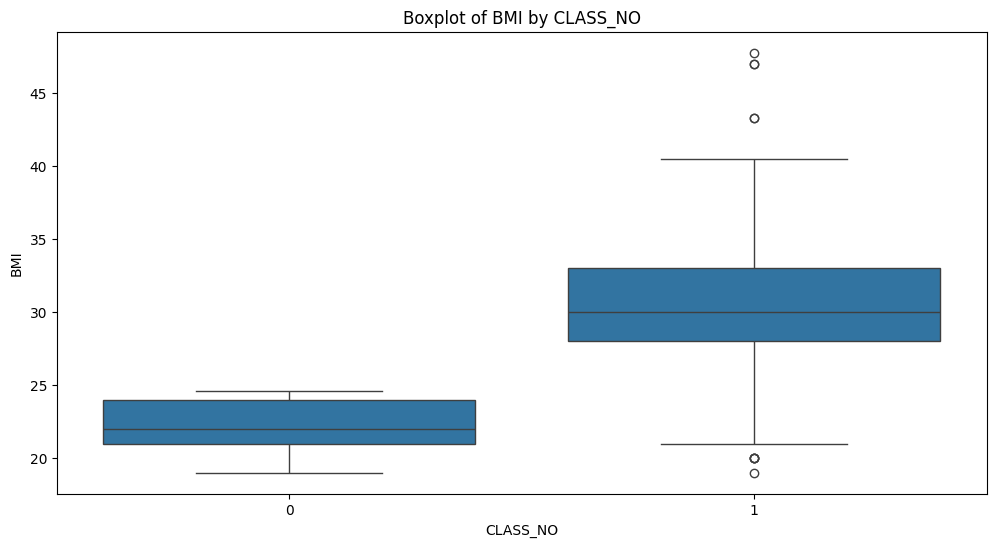

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='CLASS_NO', y='BMI', data=df)
plt.title('Boxplot of BMI by CLASS_NO')
plt.show()

##### Interpreting the Boxplot

- Box: The colored box shows where the middle 50% of the Urea values are. This gives you an idea of the typical range of values.

- Line in the Box (Median): The line inside the box represents the median Urea value, which is the middle value when all Urea values are sorted.

- Whiskers: The lines extending from the box show the range of the data, except for the outliers. These lines give you an idea of how spread out the values are.

- Outliers: Any dots outside the whiskers are considered outliers. These are values that are much different from the rest of the data.

##### What is a Boxplot?
A boxplot is a simple chart that helps you see the distribution of your data. It shows you where most of your data points lie and if there are any unusual values (outliers).

- Key Parts of a Boxplot:
- Box: The main part of the plot that shows where the middle 50% of the data is.
- Line in the Box: This line is the median, which is the middle value of your data.
- Whiskers: Lines that extend from the box to the smallest and largest values that are not outliers.
- Outliers: Dots outside the whiskers that show values that are much higher or lower than the rest of the data.

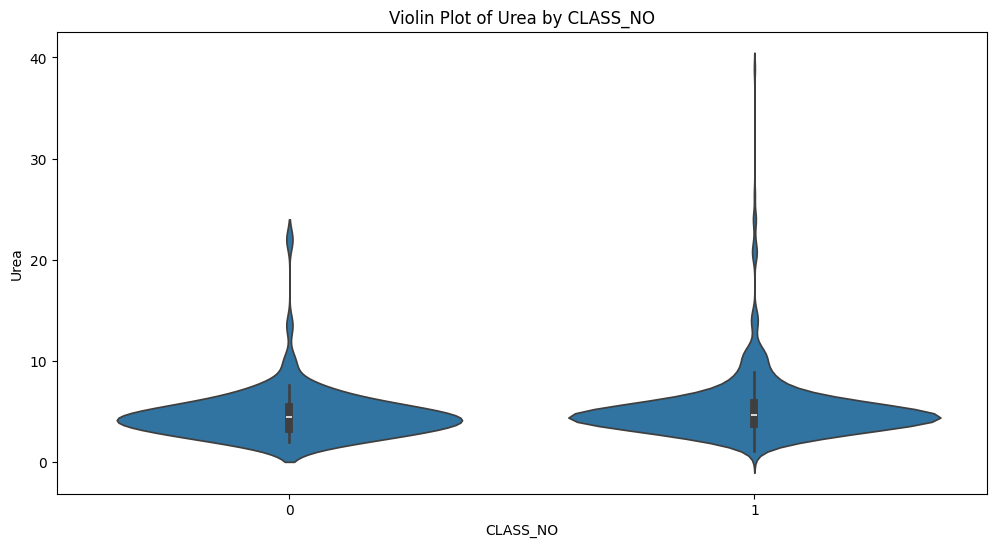

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CLASS_NO', y='Urea', data=df)
plt.title('Violin Plot of Urea by CLASS_NO')
plt.show()


Simplified Steps to Read a Violin Plot

- Look at the Width of the Violin:

Where the violin is wide, many data points are located there.
Narrow parts mean fewer data points.

- Check the Inner Box and Line:

The inner box represents the range of the middle 50% of the data.
The line inside the box is the median value.

- Observe the Lines Extending from the Box:

These lines show the range of the data, similar to the whiskers in a boxplot.

##### What is a Violin Plot?
A violin plot is a method of plotting numeric data and can be understood as a combination of a boxplot and a density plot. It shows the distribution of the data across different categories, providing more information about the shape of the data distribution.

- Key Parts of a Violin Plot:
- Violin Shape: The shape of the violin represents the distribution of the data. The wider the violin at a given value, the more data points are found at that value.
- Inner Box: Similar to a boxplot, the inner box shows the interquartile range (IQR) and the median.
- Lines: Lines extending from the inner box to the top and bottom represent the range of the data, excluding outliers.

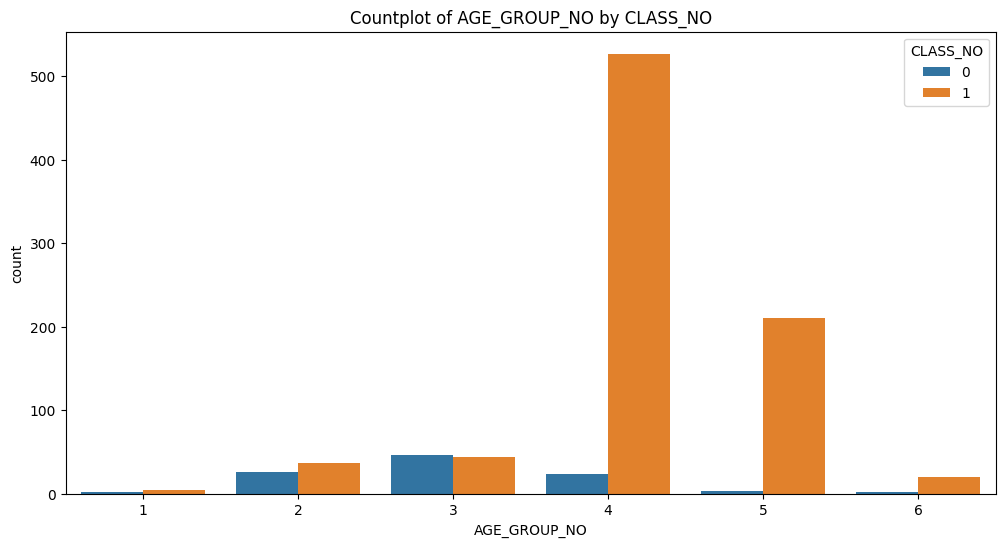

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE_GROUP_NO', hue='CLASS_NO', data=df)
plt.title('Countplot of AGE_GROUP_NO by CLASS_NO')
plt.show()


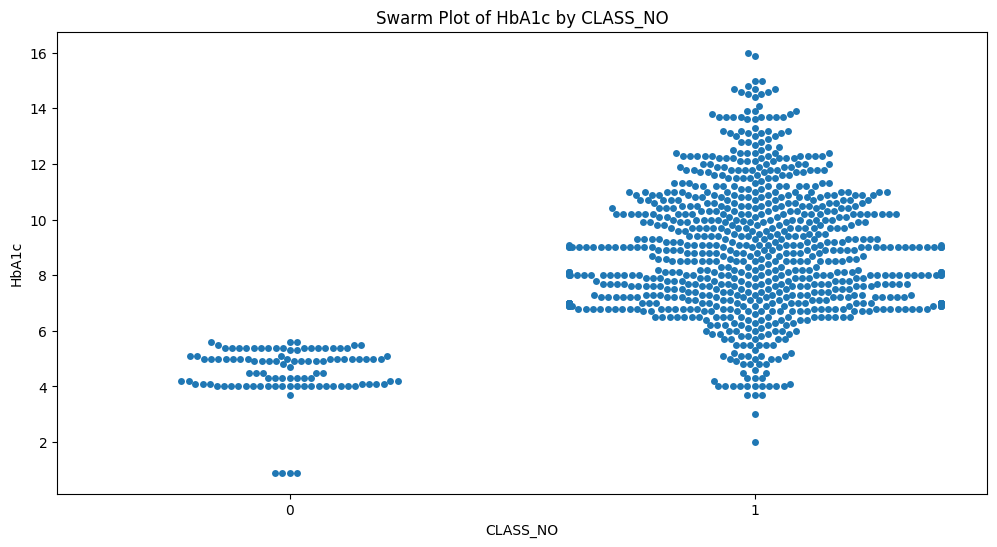

In [29]:
# warning off
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))
sns.swarmplot(x='CLASS_NO', y='HbA1c', data=df)
plt.title('Swarm Plot of HbA1c by CLASS_NO')
plt.show()



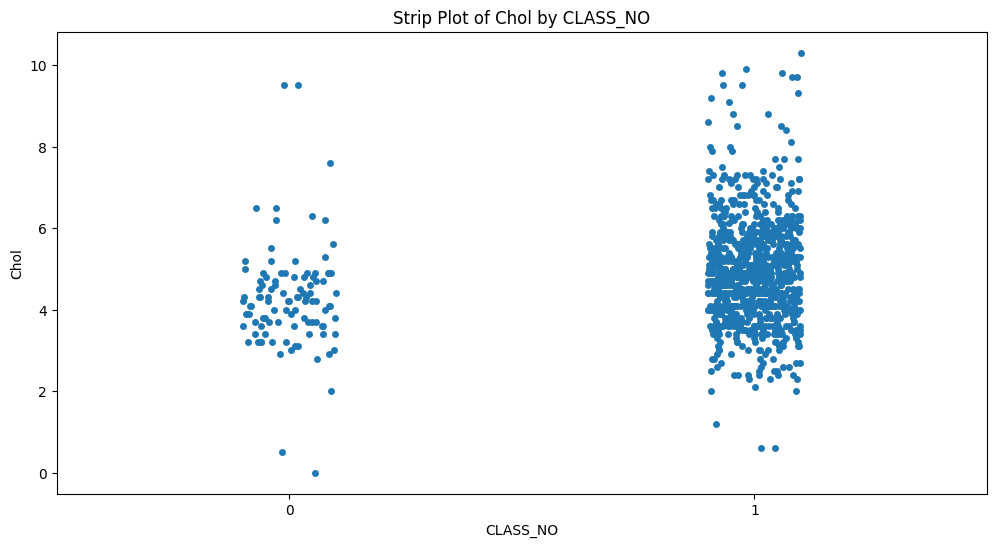

In [30]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='CLASS_NO', y='Chol', data=df, jitter=True)
plt.title('Strip Plot of Chol by CLASS_NO')
plt.show()


Distribution Visualization  <br>


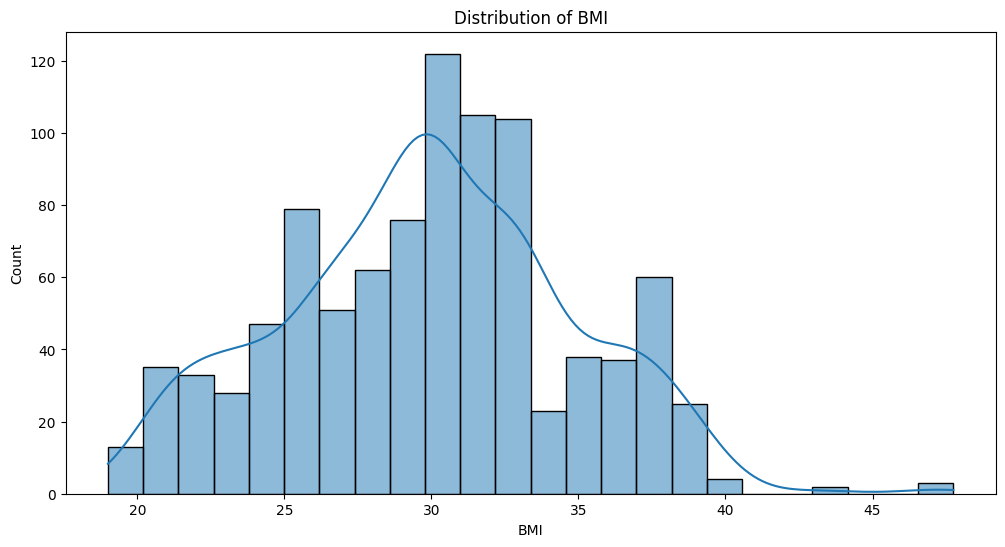

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()


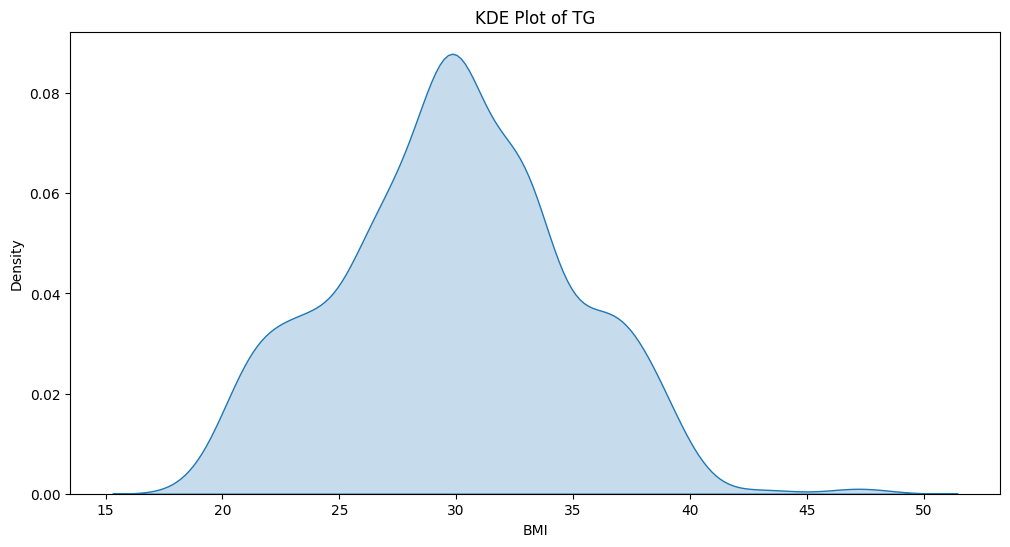

In [32]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['BMI'], shade=True)
plt.title('KDE Plot of TG')
plt.show()


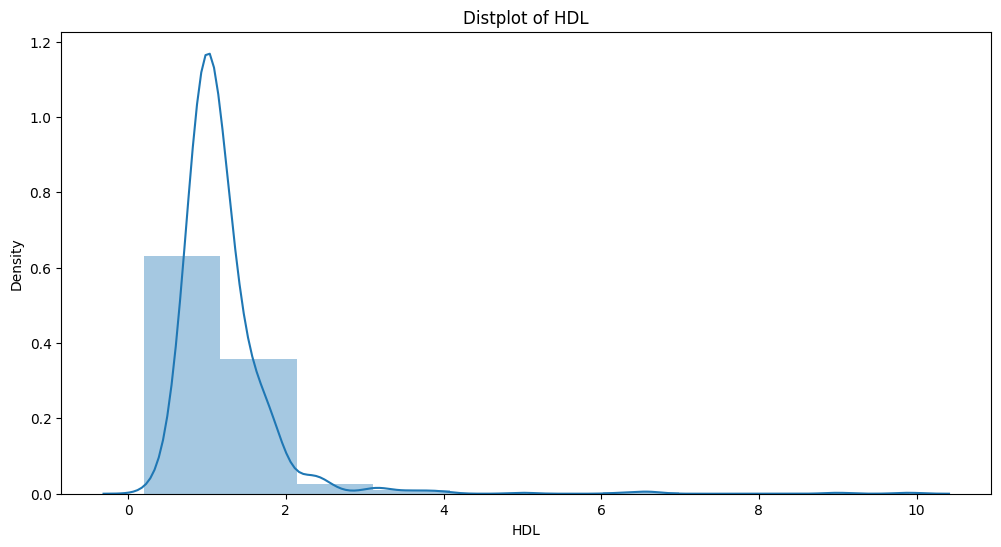

In [33]:
plt.figure(figsize=(12, 6))
sns.distplot(df['HDL'], bins=10, kde=True)
plt.title('Distplot of HDL')
plt.show()


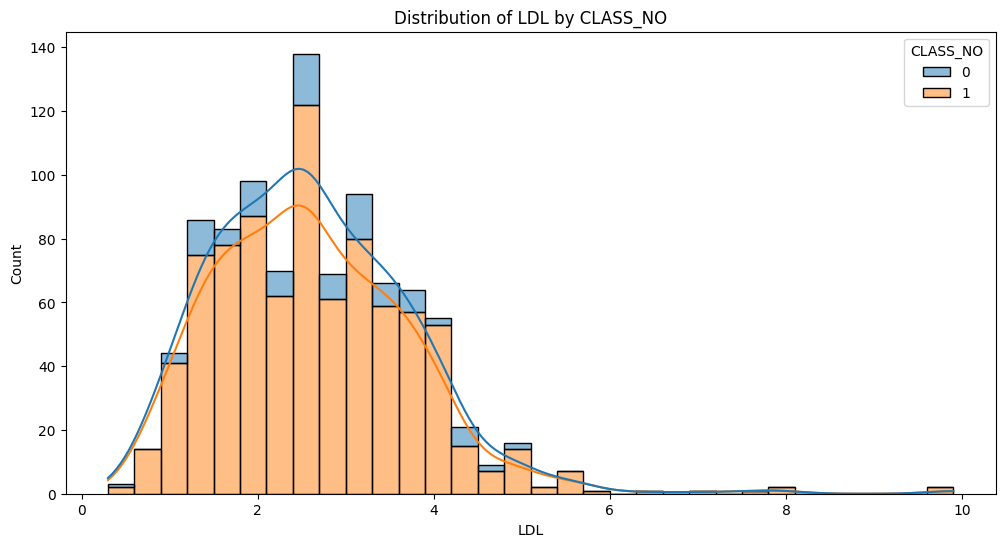

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='LDL', hue='CLASS_NO', multiple="stack", kde=True)
plt.title('Distribution of LDL by CLASS_NO')
plt.show()


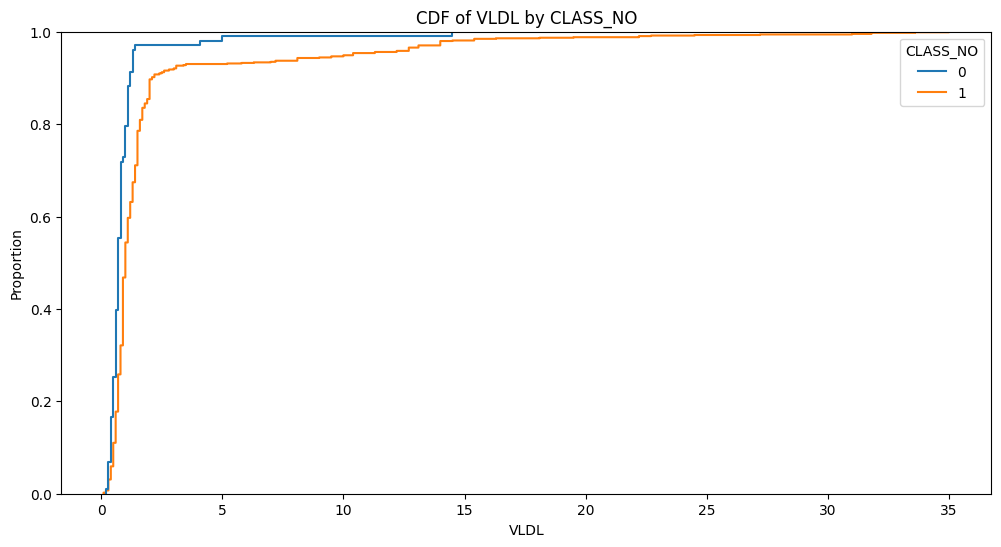

In [35]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(data=df, x='VLDL', hue='CLASS_NO')
plt.title('CDF of VLDL by CLASS_NO')
plt.show()


Correlation Visualization  <br>

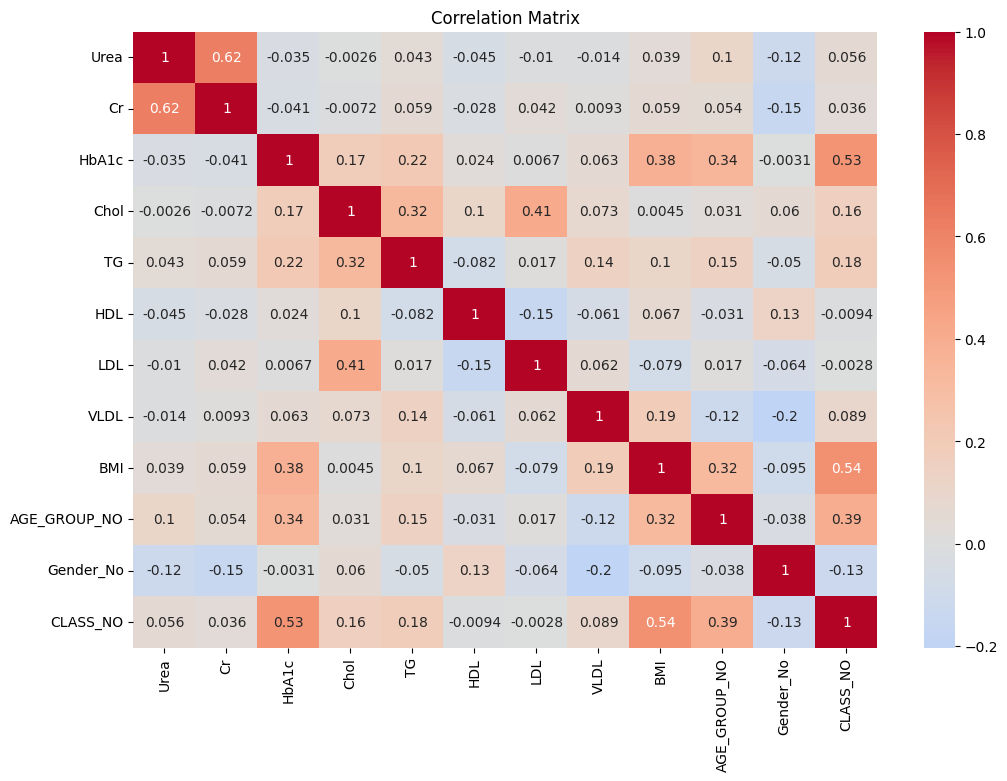

In [36]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


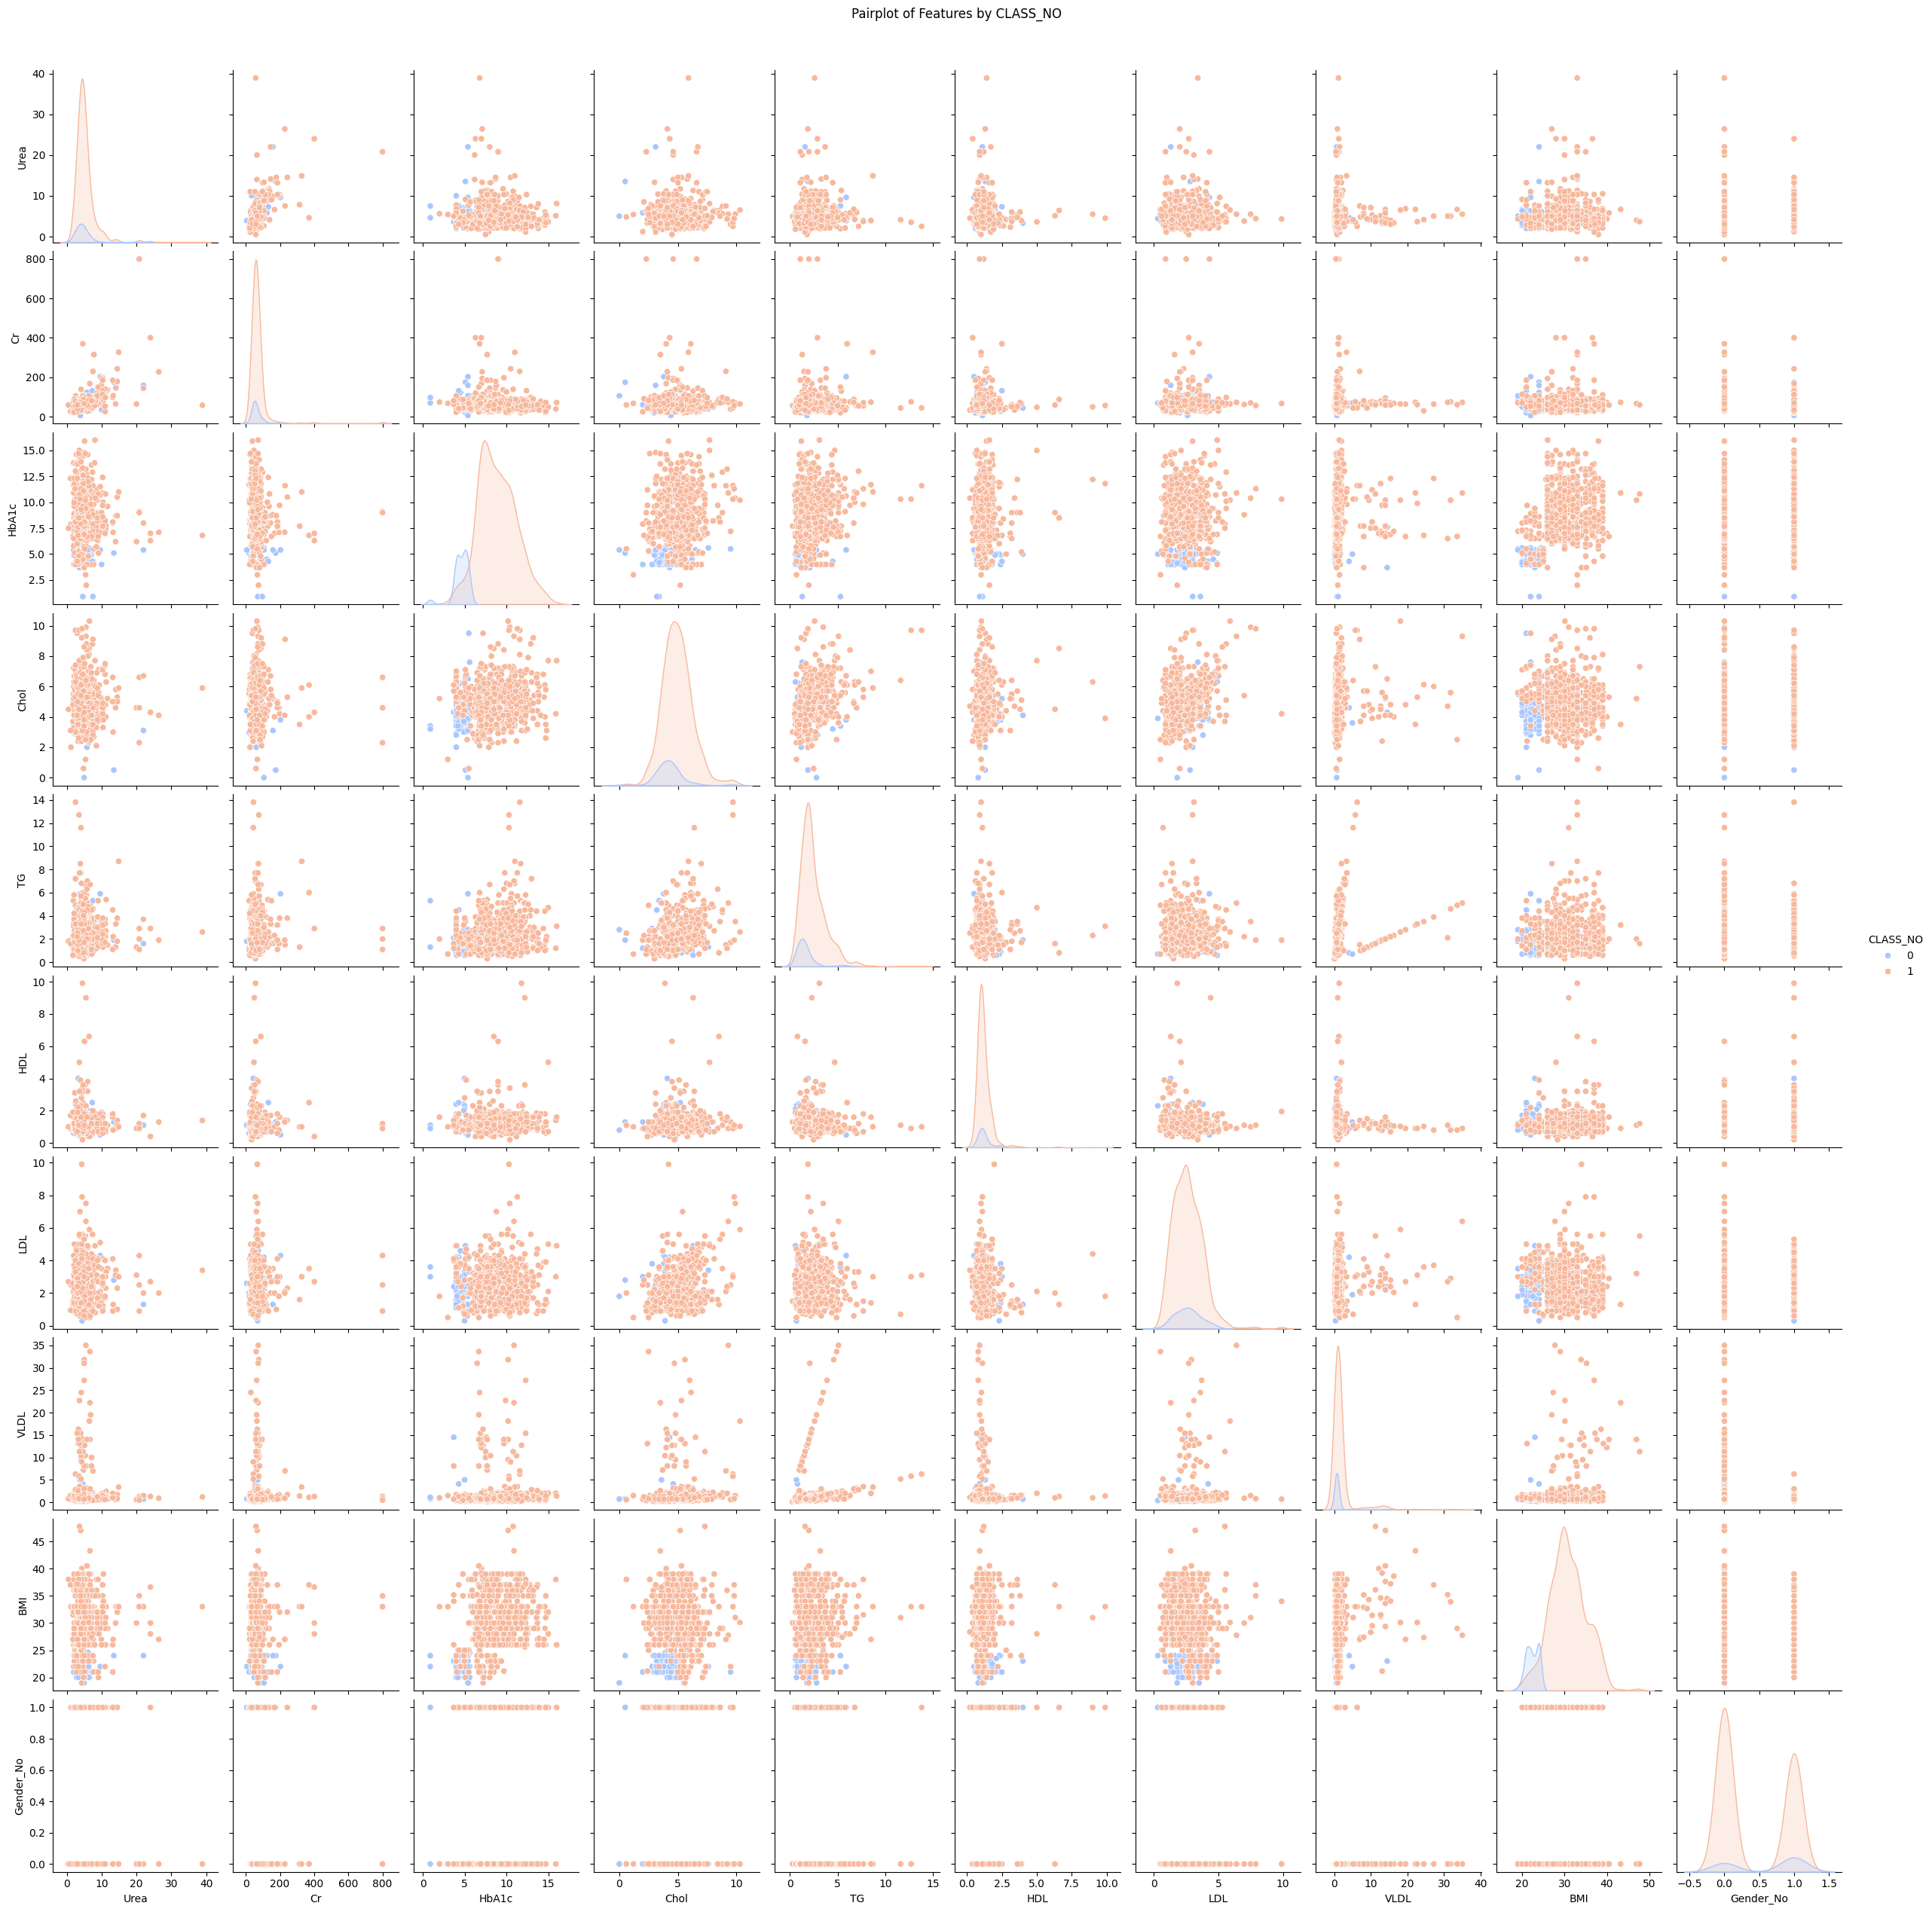

In [40]:
sns.pairplot(df, hue='CLASS_NO', palette='coolwarm')
plt.suptitle('Pairplot of Features by CLASS_NO', y=1.02)
plt.show()


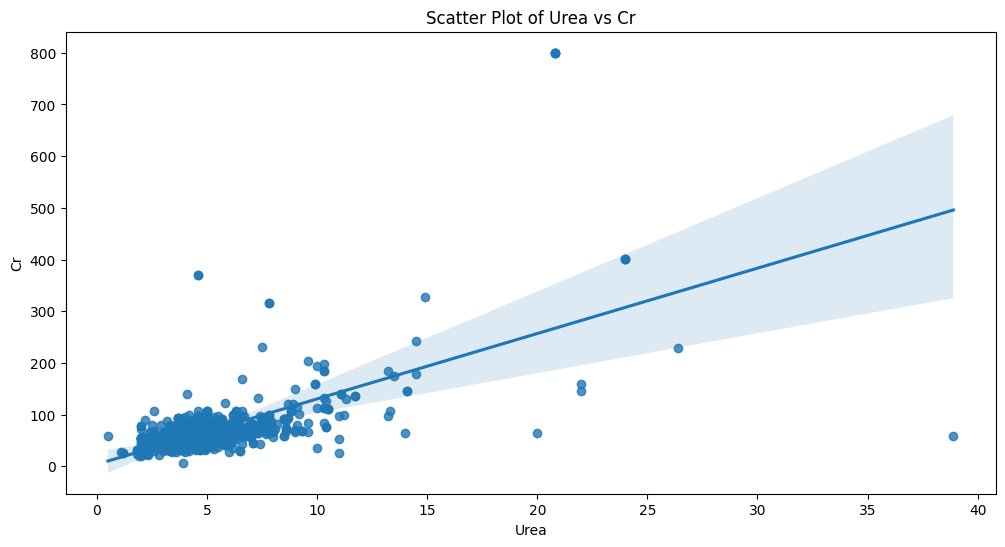

In [41]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Urea', y='Cr', data=df)
plt.title('Scatter Plot of Urea vs Cr')
plt.show()


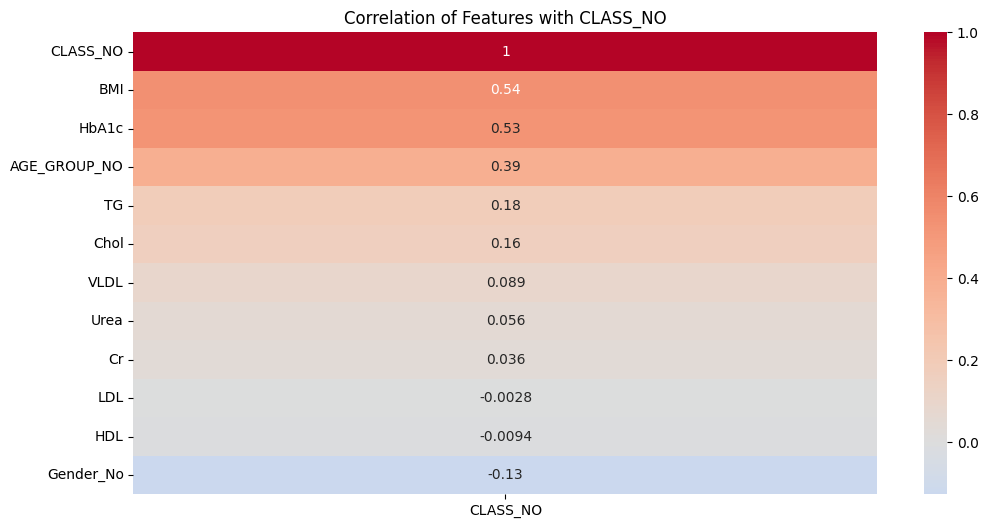

In [37]:
plt.figure(figsize=(12, 6))
target_corr = df.corr()['CLASS_NO'].sort_values(ascending=False).to_frame()
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with CLASS_NO')
plt.show()


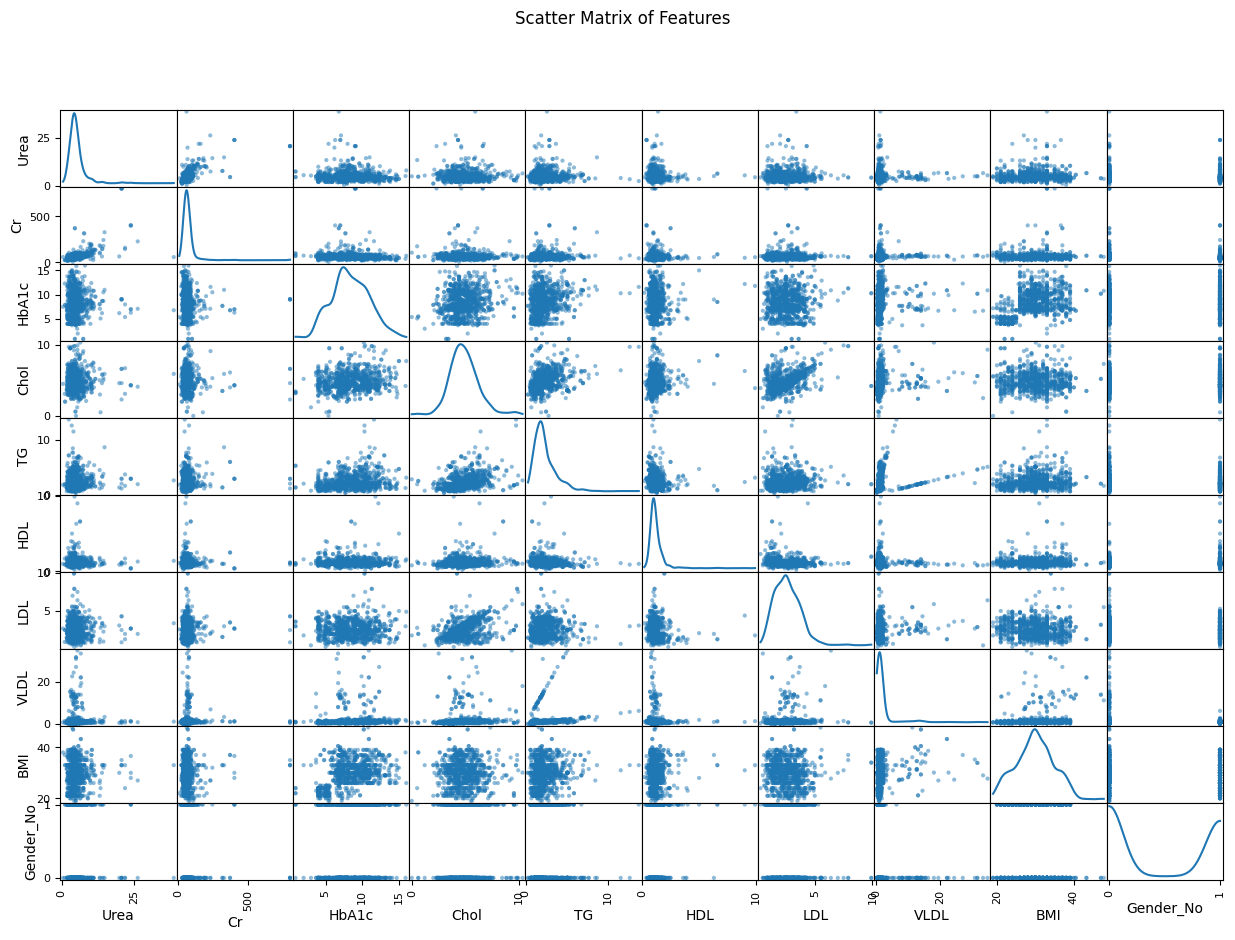

In [43]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.drop('CLASS_NO', axis=1), figsize=(15, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Features')
plt.show()


Feature Importance Visualization  <br>

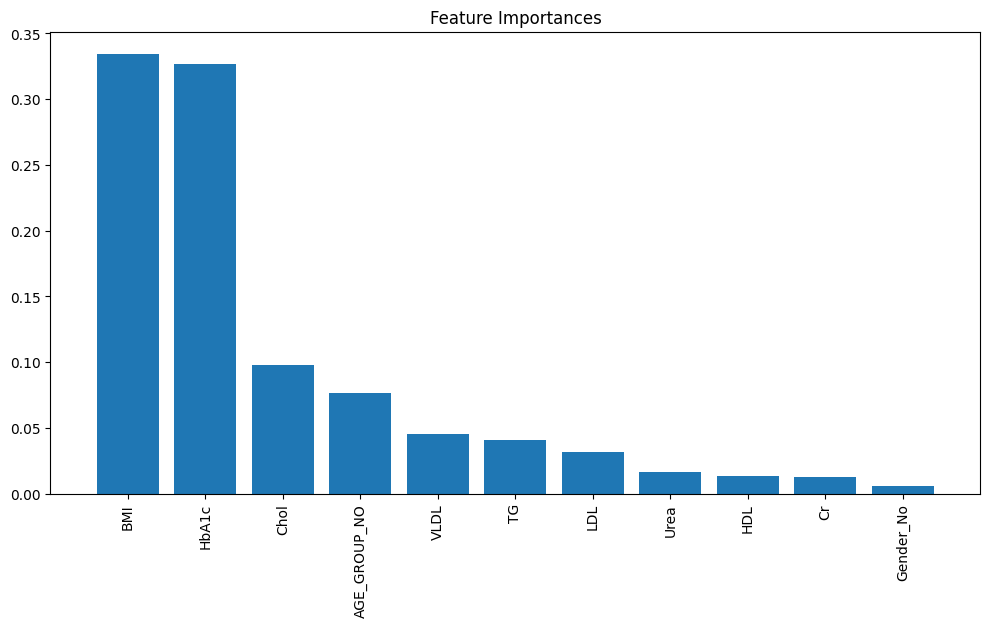

In [44]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Preparing the data
Xe = df.drop('CLASS_NO', axis=1)
ye = df['CLASS_NO']

# Train a random forest classifier
modele = RandomForestClassifier(random_state=42)
modele.fit(Xe, ye)

# Get feature importances
importances = modele.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = Xe.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(Xe.shape[1]), importances[indices], align='center')
plt.xticks(range(Xe.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, Xe.shape[1]])
plt.show()


Split The Dataset into Training and Testing Sets

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.drop(columns=['CLASS_NO'])  
y = df['CLASS_NO']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression

In [39]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[ 17   3]
 [  1 169]]

Accuracy: 0.9789473684210527


Random Forest Classifier

In [40]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_classifier = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)


best_rf_classifier.fit(X_train, y_train)


y_pred = best_rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[ 18   2]
 [  2 168]]

Accuracy: 0.9789473684210527


In [41]:

# save the model
import joblib

joblib.dump(best_rf_classifier, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [54]:
# showing all rows in which class_no is 1
df[df['CLASS_NO'] == 0].head(3)

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,AGE_GROUP_NO,Gender_No,CLASS_NO
0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0,0
2,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0


In [55]:
import numpy as np
model = joblib.load('diabetes_model.pkl')

# Zero Class

Gender_No       = 1
AGE_GROUP_NO    = 4
Urea            = 4.7
Cr              = 46
HbA1c           = 4.9
Chol            = 4.2
TG              = 0.9
HDL             = 2.4
LDL             = 1.4
VLDL            = 0.5
BMI             = 24.0

# One Class

# Gender_No       = 0
# AGE_GROUP_NO    = 2
# Urea            = 3.0
# Cr              = 60
# HbA1c           = 12.3
# Chol            = 4.1
# TG              = 2.2
# HDL             = 0.7
# LDL             = 2.4
# VLDL            = 15.4
# BMI             = 37.2




custom_values = np.array([[Gender_No, AGE_GROUP_NO, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI]])
prediction = model.predict(custom_values)
prediction_proba = model.predict_proba(custom_values)

if prediction[0] == 0:
    prediction = 'Yes'
else:
    prediction = 'No'

print(f"Prediction: {prediction}")
print(f"Probability of Class: {prediction_proba[0][0]:.2f}")



Prediction: No
Probability of Class: 0.29


Random Forest return 97% accuracy on 10 cv and 98% on 5 cv.

XGB Classifier

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score




X = df.drop(columns=['CLASS_NO']).values  # Features
y = df['CLASS_NO'].values  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


xgb_classifier = XGBClassifier(random_state=42)


grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=10, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_xgb_classifier = XGBClassifier(**best_params, random_state=42)


best_xgb_classifier.fit(X_train, y_train)


y_pred = best_xgb_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}
Confusion Matrix:
[[ 18   2]
 [  2 168]]

Accuracy: 0.9789473684210527


XGBoost return 98% accuracy on 5 cv and 97% on 5 cv.

In [49]:
df.head()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,AGE_GROUP_NO,Gender_No,CLASS_NO
0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0,0
2,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
3,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,4,1,0
4,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,2,0,0


In [50]:
df.isnull().sum()

Urea            0
Cr              0
HbA1c           0
Chol            0
TG              0
HDL             0
LDL             0
VLDL            0
BMI             0
AGE_GROUP_NO    0
Gender_No       0
CLASS_NO        0
dtype: int64

Let's Scaled our Features and Apply Models on it.

In [56]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


columns_to_scale = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

columns_scaled = [col + '_scaled' for col in columns_to_scale]


scale_values = df[columns_to_scale].values


scaler = StandardScaler()


scaled_array = scaler.fit_transform(scale_values)


df_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)


df.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)


df_concatenated = pd.concat([df, df_scaled], axis=1)


df_concatenated.head()

# save the scaler 
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Now you can run your machine learning models on ONLY scaled featuers or you can give original features and their scaled versions both at the same time. <br>

you can also scaled the AGE_GROUP_NO column and check the performance of the model as well.

In [52]:
df_concatenated.isnull().sum()

Urea            0
Cr              0
HbA1c           0
Chol            0
TG              0
HDL             0
LDL             0
VLDL            0
BMI             0
AGE_GROUP_NO    0
Gender_No       0
CLASS_NO        0
Urea_scaled     0
Cr_scaled       0
HbA1c_scaled    0
Chol_scaled     0
TG_scaled       0
HDL_scaled      0
LDL_scaled      0
VLDL_scaled     0
BMI_scaled      0
dtype: int64

Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split


X = df_concatenated.drop(columns=['CLASS_NO'])  
y = df_concatenated['CLASS_NO']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)



Confusion Matrix:
[[ 17   3]
 [  1 169]]

Accuracy: 0.9789473684210527


In [54]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_classifier = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)


best_rf_classifier.fit(X_train, y_train)


y_pred = best_rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Confusion Matrix:
[[ 19   1]
 [  2 168]]

Accuracy: 0.9842105263157894


In [55]:
# xgboost

X = df_concatenated.drop(columns=['CLASS_NO']).values  # Features
y = df_concatenated['CLASS_NO'].values  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_classifier = XGBClassifier()
xgb_model = xgb_classifier.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9842105263157894


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score




X = df_concatenated.drop(columns=['CLASS_NO']).values  # Features
y = df_concatenated['CLASS_NO'].values  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


xgb_classifier = XGBClassifier(random_state=42)


grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_xgb_classifier = XGBClassifier(**best_params, random_state=42)


best_xgb_classifier.fit(X_train, y_train)


y_pred = best_xgb_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Confusion Matrix:
[[ 18   2]
 [  2 168]]

Accuracy: 0.9789473684210527


Now Let's train the models with ONLY Scaled Features and Check The Results.

This time we Compare various models at once.

In [57]:
df_concatenated.columns

Index(['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI',
       'AGE_GROUP_NO', 'Gender_No', 'CLASS_NO', 'Urea_scaled', 'Cr_scaled',
       'HbA1c_scaled', 'Chol_scaled', 'TG_scaled', 'HDL_scaled', 'LDL_scaled',
       'VLDL_scaled', 'BMI_scaled'],
      dtype='object')

In [57]:
X = df_concatenated[['Gender_No','AGE_GROUP_NO','Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']].values
y = df_concatenated['CLASS_NO'].values
train_set, test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [60]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [61]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.8747032474804032 (0.27393115363273735)
KNN: 0.857872340425532 (0.30039698656458985)
NB: 0.9209854423292274 (0.14200659112906686)
SVC: 0.8641993281075028 (0.3059999621669392)
RFC: 0.8705263157894738 (0.29383508669276576)
DTR: 0.9305263157894738 (0.13902709036714994)
XGB: 0.9305263157894738 (0.13902709036714994)


In [62]:
XGBClassifier_model = XGBClassifier()
XGBClassifier_model_fitted = XGBClassifier_model.fit(train_set,train_label)
XGBClassifier_model_prediction = XGBClassifier_model.predict(test_set)

Accuracy on ONLY Test Set.

In [63]:
print('XGB Classifier Accuracy Score:\n', accuracy_score(test_label, XGBClassifier_model_prediction))

XGB Classifier Accuracy Score:
 1.0


Classification Report on Test Set.

In [64]:
print('XGB Classifier Report:\n', classification_report(test_label,XGBClassifier_model_prediction,target_names=['0','1']))

XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       175

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



As you can see our xgboost model is accurately predict all the test instacted in both classes, which too rare because it's achieved the accuary of 100% which can be considered as overfit. Let's overcome this approch.

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


XGBClassifier_model = XGBClassifier()


param_grid = {
    'max_depth': [3, 6, 9],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of trees to fit
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=XGBClassifier_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)


grid_search.fit(train_set, train_label)


best_params = grid_search.best_params_


best_XGBClassifier_model = XGBClassifier(**best_params)
best_XGBClassifier_model.fit(train_set, train_label)


XGBClassifier_model_prediction = best_XGBClassifier_model.predict(test_set)


accuracy = accuracy_score(test_label, XGBClassifier_model_prediction)
classification_report_output = classification_report(test_label, XGBClassifier_model_prediction, target_names=['0', '1'])

print('Best Parameters:', best_params)
print('XGB Classifier Accuracy Score:', accuracy)
print('XGB Classifier Report:\n', classification_report_output)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}
XGB Classifier Accuracy Score: 0.9947368421052631
XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       175

    accuracy                           0.99       190
   macro avg       1.00      0.97      0.98       190
weighted avg       0.99      0.99      0.99       190



In [66]:
# save the best_XGBClassifier_model model for future use.

import joblib
joblib.dump(best_XGBClassifier_model, 'best_XGBClassifier_model.pkl')
print("Model is Saved Successfull, Thanks")


# save the scaler for future use.

joblib.dump(scaler, 'scaler.pkl')
print("Scaler is Saved Successfull, Thanks")

Model is Saved Successfull, Thanks
Scaler is Saved Successfull, Thanks


In [74]:
# save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [71]:
# make prediction with load model and scaler
import numpy as np
model = joblib.load('best_XGBClassifier_model.pkl')
scaler = joblib.load('scaler.pkl')


# Zero Class

Gender_No       = 1
AGE_GROUP_NO    = 4
Urea            = 4.7
Cr              = 46
HbA1c           = 4.9
Chol            = 4.2
TG              = 0.9
HDL             = 2.4
LDL             = 1.4
VLDL            = 0.5
BMI             = 24.0

# One Class

# Gender_No       = 0
# AGE_GROUP_NO    = 2
# Urea            = 3.0
# Cr              = 60
# HbA1c           = 12.3
# Chol            = 4.1
# TG              = 2.2
# HDL             = 0.7
# LDL             = 2.4
# VLDL            = 15.4
# BMI             = 37.2



custom_values = np.array([[Gender_No, AGE_GROUP_NO, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI]])

non_scaled_features = custom_values[:, :2]  # Gender_No, AGE_GROUP_NO
scaled_features = custom_values[:, 2:]  # Urea_scaled, Cr_scaled, ..., BMI_scaled


scaled_custom_values = scaler.transform(scaled_features)

custom_values = np.concatenate([non_scaled_features, scaled_custom_values], axis=1)

prediction = model.predict(custom_values)
prediction_proba = model.predict_proba(custom_values)


if prediction[0] == 0:
    prediction = 'No Diabetes'
else:
    prediction = 'Diaetes Detected'

prob = prediction_proba[0][0] * 100
print(f"Prediction: {prediction} with {prob:.2f}% probability") 

Prediction: No Diabetes with 98.71% probability


Prediction

In [ ]:

import numpy as np


Gender_No       = 0
AGE_GROUP_NO    = 2
Urea            = 50
Cr              = 1.2
HbA1c           = 5.5
Chol            = 200
TG              = 150
HDL             = 50
LDL             = 100
VLDL            = 30
BMI             = 25





custom_values = np.array([[Gender_No, AGE_GROUP_NO, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI]])


non_scaled_features = custom_values[:, :2]  # Gender_No, AGE_GROUP_NO
scaled_features = custom_values[:, 2:]  # Urea_scaled, Cr_scaled, ..., BMI_scaled


scaled_custom_values = scaler.transform(scaled_features)


combined_custom_values = np.hstack((non_scaled_features, scaled_custom_values))


prediction = best_XGBClassifier_model.predict(combined_custom_values)

print('Prediction:', prediction)


prediction_proba = best_XGBClassifier_model.predict_proba(combined_custom_values)
print('Prediction Probabilities:', prediction_proba)
